任务说明：

利用 金融数据 来预测贷款用户是否会逾期

其中，“status” 是结果标签：0 表示未逾期，1 表示逾期

任务要求：

数据切分方式：三七分

其中，测试集 30%，训练集 70%，随机种子设置为 2019

任务实现：（2 Days）

对数据进行探索和分析 EDA

数据类型的分析

无关特征的删除

数据类型的转换

缺失值的处理

......

分析步骤：

1. 数据集加载并预览原始数据


2. 对数据进行预处理（Preprocessing）：

2.1 无关特征的删除

2.2 数据类型的转换

2.3 缺失值的处理

### 1. 数据集加载及预览效果

In [ ]:
import pandas as pd

In [ ]:
# Unicode编码错误 UnicodeDecodeError    Traceback (most recent call last)
data = pd.read_csv("data_2.csv")
# 编码格式的问题 用gbk打开或手动设定为"UTF-8"

In [ ]:
print(data.shape) # 观察数据的大小 4754行 90列

In [ ]:
data.head(10)

In [ ]:
data.columns

### 2. 对数据进行预处理（Preprocessing）

#### 2.1找到无关特征并删除

In [ ]:
data["bank_card_no"]

In [ ]:
data["source"]

In [ ]:
data["custid"]

In [ ]:
data[['trade_no', 'id_name', 'Unnamed: 0']]

对以上字段进行 drop 删除操作！！

bank_card_no 、 source 取值没有区分度，所以进行删除！

trade_no 、 id_name 、 Unnamed: 0 、 custid 和 预测 没有关联，所以进行删除！

Note!

(1) axis 0 表明用标签序列调用 drop 会从行标签删除值

(2) drop 函数会修改 Series 或 DataFrame 的大小或形状，可以就地修改对象，不会返回新 的对象，所以，应该小心使用 inplace， 因为它会销毁所有被删除的数据！！

In [ ]:
data.drop(['bank_card_no', 'source', 'trade_no', 'id_name', 'Unnamed: 0', 'custid','first_transaction_time', 'latest_query_time', 'loans_latest_time'], axis=1, inplace=True)

In [ ]:
print(data.shape)

#### 2.2 数据类型转换

In [37]:
# 字符类型的特征处理
data['reg_preference_for_trad'].value_counts()

0    3403
1    1064
2     150
3     131
4       4
5       2
Name: reg_preference_for_trad, dtype: int64

In [38]:
dic = {}
for i, val in enumerate(list(data['reg_preference_for_trad'].unique())): # 复习 enumerate 操作
    dic[val] = i

In [39]:
dic

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [40]:
list(data['reg_preference_for_trad'].unique())

[0, 1, 2, 3, 4, 5]

In [41]:
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(dic)

In [42]:
print(type(data['reg_preference_for_trad']))

<class 'pandas.core.series.Series'>


In [43]:
data['reg_preference_for_trad']

0       0
1       0
2       0
3       1
4       0
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      2
17      0
18      2
19      0
20      0
21      0
22      2
23      1
24      0
25      2
26      0
27      1
28      0
29      0
       ..
4724    0
4725    0
4726    2
4727    0
4728    0
4729    0
4730    1
4731    1
4732    0
4733    3
4734    2
4735    0
4736    0
4737    0
4738    0
4739    1
4740    0
4741    0
4742    0
4743    1
4744    0
4745    1
4746    0
4747    2
4748    0
4749    0
4750    0
4751    0
4752    0
4753    0
Name: reg_preference_for_trad, Length: 4754, dtype: int64

#### 2.3 缺失值处理

In [44]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        print('%.4f'%(summ*100/4754), '%',  '<==>', feature)

63.0627 % <==> student_feature

student_feature 缺失占比较多，用众数填充

data['student_feature'].fillna(1.0, inplace = True)

In [45]:
data['student_feature'].value_counts()

1.0    4752
2.0       2
Name: student_feature, dtype: int64

In [46]:
data['student_feature'].fillna(1.0, inplace = True)

In [47]:
data['student_feature'].value_counts()

1.0    4752
2.0       2
Name: student_feature, dtype: int64

In [48]:
data.dtypes

low_volume_percent                        float64
middle_volume_percent                     float64
take_amount_in_later_12_month_highest       int64
trans_amount_increase_rate_lately         float64
trans_activity_month                      float64
trans_activity_day                        float64
transd_mcc                                float64
trans_days_interval_filter                float64
trans_days_interval                       float64
regional_mobility                         float64
student_feature                           float64
repayment_capability                        int64
is_high_user                                int64
number_of_trans_from_2011                 float64
historical_trans_amount                     int64
historical_trans_day                      float64
rank_trad_1_month                         float64
trans_amount_3_month                        int64
avg_consume_less_12_valid_month           float64
abs                                         int64


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 81 columns):
low_volume_percent                            4754 non-null float64
middle_volume_percent                         4754 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4754 non-null float64
trans_activity_month                          4754 non-null float64
trans_activity_day                            4754 non-null float64
transd_mcc                                    4754 non-null float64
trans_days_interval_filter                    4754 non-null float64
trans_days_interval                           4754 non-null float64
regional_mobility                             4754 non-null float64
student_feature                               4754 non-null float64
repayment_capability                          4754 non-null int64
is_high_user                                  4754 non-null int64
number_of_trans

其余特征用 mean均值 填充

In [50]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        data[feature].fillna(data[feature].mean(), inplace = True)


### 3. 划分数据集

In [51]:
features = [x for x in data.columns if x not in ['status']]

In [52]:
features

['low_volume_percent',
 'middle_volume_percent',
 'take_amount_in_later_12_month_highest',
 'trans_amount_increase_rate_lately',
 'trans_activity_month',
 'trans_activity_day',
 'transd_mcc',
 'trans_days_interval_filter',
 'trans_days_interval',
 'regional_mobility',
 'student_feature',
 'repayment_capability',
 'is_high_user',
 'number_of_trans_from_2011',
 'historical_trans_amount',
 'historical_trans_day',
 'rank_trad_1_month',
 'trans_amount_3_month',
 'avg_consume_less_12_valid_month',
 'abs',
 'top_trans_count_last_1_month',
 'avg_price_last_12_month',
 'avg_price_top_last_12_valid_month',
 'reg_preference_for_trad',
 'trans_top_time_last_1_month',
 'trans_top_time_last_6_month',
 'consume_top_time_last_1_month',
 'consume_top_time_last_6_month',
 'cross_consume_count_last_1_month',
 'trans_fail_top_count_enum_last_1_month',
 'trans_fail_top_count_enum_last_6_month',
 'trans_fail_top_count_enum_last_12_month',
 'consume_mini_time_last_1_month',
 'max_cumulative_consume_later_1_m

In [73]:
import warnings
warnings.filterwarnings("ignore")
# 将数据集划分为训练集测试集
from sklearn.model_selection import train_test_split
# 预处理 标准化操作
from sklearn.preprocessing import StandardScaler
# 特征 与 标签
X = data[features]
y = data.status
# 训练集 和 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)
# 对特征进行归一化处理
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### 4. 模型选择

 Logistic Regression  逻辑回归模型

SVM 模型

Decision Tree 模型

XGB 模型

LGB模型

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
from sklearn import svm

In [77]:
svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [88]:
from lightgbm.sklearn import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 5. 模型调参

### 6. 模型评估

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测训练集和测试集
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率Accuracy
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率Precision
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率Recall
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC取值
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # ROC曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

[准确率] 训练集： 0.7995 测试集： 0.8024
[精准率] 训练集： 0.7094 测试集： 0.7052
[召回率] 训练集： 0.3488 测试集： 0.3456
[f1-score] 训练集： 0.4677 测试集： 0.4639
[auc值] 训练集： 0.8054 测试集： 0.8050


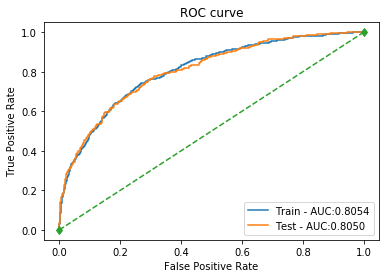

In [82]:
# 逻辑回归
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7908 测试集： 0.7947
[精准率] 训练集： 0.7647 测试集： 0.7885
[召回率] 训练集： 0.2476 测试集： 0.2323
[f1-score] 训练集： 0.3741 测试集： 0.3589
[auc值] 训练集： 0.8042 测试集： 0.8092


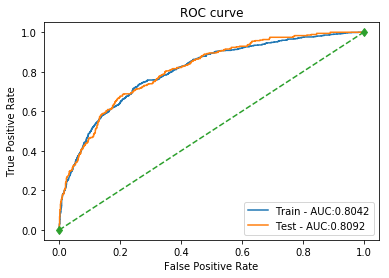

In [83]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8284 测试集： 0.7554
[精准率] 训练集： 0.9786 测试集： 0.5208
[召回率] 训练集： 0.3274 测试集： 0.1416
[f1-score] 训练集： 0.4906 测试集： 0.2227
[auc值] 训练集： 0.9391 测试集： 0.7117


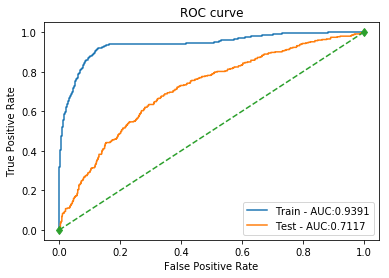

In [84]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8386 测试集： 0.7786
[精准率] 训练集： 0.9046 测试集： 0.6777
[召回率] 训练集： 0.3981 测试集： 0.2284
[f1-score] 训练集： 0.5529 测试集： 0.3417
[auc值] 训练集： 0.9141 测试集： 0.7501


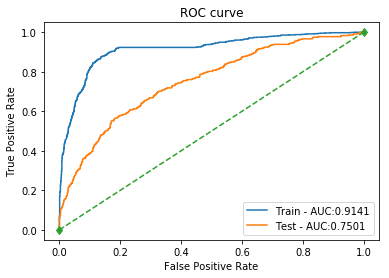

In [68]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7205 测试集： 0.7379
[精准率] 训练集： 0.4373 测试集： 0.4662
[召回率] 训练集： 0.3738 测试集： 0.4108
[f1-score] 训练集： 0.4031 测试集： 0.4367
[auc值] 训练集： 0.6600 测试集： 0.6784


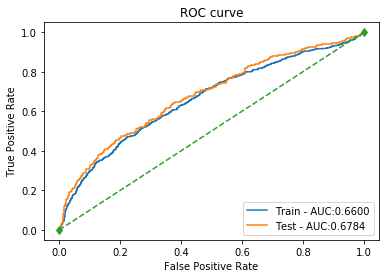

In [85]:
# sigmoid-SVM
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8028 测试集： 0.7582
[精准率] 训练集： 0.6648 测试集： 0.5292
[召回率] 训练集： 0.4305 测试集： 0.3538
[f1-score] 训练集： 0.5226 测试集： 0.4240
[auc值] 训练集： 0.7734 测试集： 0.6928


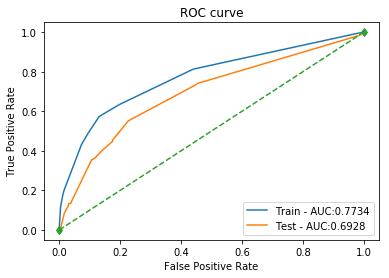

In [70]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8521 测试集： 0.8045
[精准率] 训练集： 0.8718 测试集： 0.7079
[召回率] 训练集： 0.4857 测试集： 0.3569
[f1-score] 训练集： 0.6239 测试集： 0.4746
[auc值] 训练集： 0.9166 测试集： 0.7972


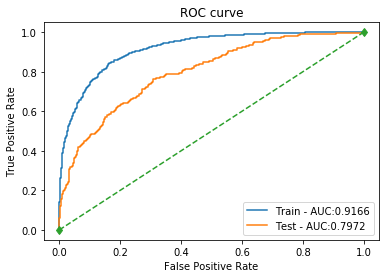

In [86]:
# XGBoost
model_metrics(xgb, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.9949 测试集： 0.7961
[精准率] 训练集： 1.0000 测试集： 0.6550
[召回率] 训练集： 0.9798 测试集： 0.3711
[f1-score] 训练集： 0.9898 测试集： 0.4738
[auc值] 训练集： 1.0000 测试集： 0.7869


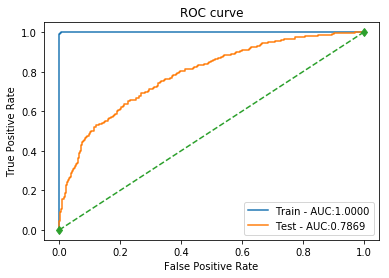

In [91]:
# lightGBM
model_metrics(lgb, X_train, X_test, y_train, y_test)